In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [18]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
cdf = df[['High', 'Low', 'Open', 'Volume','Close']]
cdf.head(9)

,High,Low,Open,Volume,Close
0,25.000000,17.540001,19.000000,18766300,23.889999
1,30.420000,23.299999,25.790001,17187100,23.830000
2,25.920000,20.270000,25.000000,8218800,21.959999
3,23.100000,18.709999,23.000000,5139800,19.200001
4,20.000000,15.830000,20.000000,6866900,16.110001
5,16.629999,14.980000,16.400000,6921700,15.800000
6,17.520000,15.570000,16.139999,7711400,17.459999
7,17.900000,16.549999,17.580000,4050600,17.400000
8,18.070000,17.000000,17.950001,2202500,17.049999


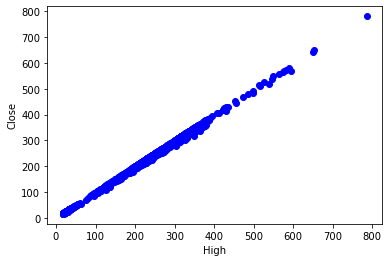

In [8]:
plt.scatter(cdf.High, cdf.Close,  color='blue')
plt.xlabel("High")
plt.ylabel("Close")
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

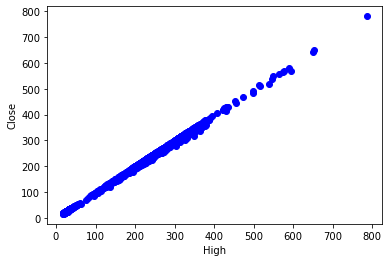

In [10]:
plt.scatter(train.High, train.Close,  color='blue')
plt.xlabel("High")
plt.ylabel("Close")
plt.show()

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['High', 'Low', 'Open', 'Volume']])
y = np.asanyarray(train[['Close']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 9.05033906e-01  7.50080953e-01 -6.56015667e-01 -1.59622521e-08]]


In [12]:
y_hat= regr.predict(test[['High', 'Low', 'Open', 'Volume']])
x = np.asanyarray(test[['High', 'Low', 'Open', 'Volume']])
y = np.asanyarray(test[['Close']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 4.31
Variance score: 1.00


C:\Users\hc\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [13]:
print(y_hat)

[[ 16.97982076]
 [ 20.65826378]
 [ 21.01079739]
 [ 18.95256644]
 [ 18.16560623]
 [ 20.51109828]
 [ 19.75843214]
 [ 20.34578183]
 [ 20.18121695]
 [ 20.76121619]
 [ 21.48486505]
 [ 22.13677268]
 [ 21.32706372]
 [ 29.42925088]
 [ 34.25165531]
 [ 32.06534774]
 [ 30.75578915]
 [ 30.97053425]
 [ 27.04963699]
 [ 22.90301482]
 [ 24.41125567]
 [ 23.19536291]
 [ 22.07323722]
 [ 23.87773115]
 [ 23.44107437]
 [ 22.88953251]
 [ 22.2336034 ]
 [ 25.6811942 ]
 [ 24.73422466]
 [ 25.67970202]
 [ 26.59554304]
 [ 26.84836517]
 [ 27.29021649]
 [ 27.88011997]
 [ 27.51990983]
 [ 30.8524604 ]
 [ 27.33763842]
 [ 26.42996087]
 [ 29.73666041]
 [ 28.66513789]
 [ 29.94767328]
 [ 28.72606986]
 [ 23.99775521]
 [ 25.89447795]
 [ 22.58858496]
 [ 23.6962164 ]
 [ 23.64459262]
 [ 27.46280243]
 [ 27.44153125]
 [ 27.05972514]
 [ 27.84236437]
 [ 28.86510154]
 [ 32.08261094]
 [ 31.56738318]
 [ 34.69995745]
 [ 34.16406793]
 [ 30.78589067]
 [ 27.56858539]
 [ 28.57554521]
 [ 28.43167335]
 [ 29.16851151]
 [ 28.02157611]
 [ 27.06

In [14]:
df2 = pd.DataFrame({'Actual': y.flatten(), 'Predicted' : y_hat.flatten()})

In [15]:
df2.head(25)

,Actual,Predicted
0,17.400000,16.979821
1,20.639999,20.658264
2,21.000000,21.010797
3,19.030001,18.952566
4,17.900000,18.165606
5,20.450001,20.511098
6,19.559999,19.758432
7,20.230000,20.345782
8,20.049999,20.181217
9,20.850000,20.761216


In [16]:
graph = df2.head(20)

<AxesSubplot:>

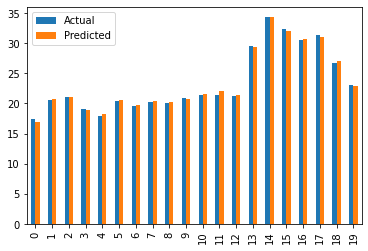

In [17]:
graph.plot(kind='bar')